In [28]:
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction
import matplotlib.pyplot as plt

In [29]:
def black_box_function(p):
    return p['x1'] - p['y1']**2 - p['x2']**2 + p['y2'] + p['x3']**2 - p['y3']

In [63]:
optimizer = BayesianOptimization(
    f = None,
    pbounds = {'x1': (-0.15, 0.05), 'y1': (-0.15, 0.05),\
               'x2': (-0.15, 0.05), 'y2': (-0.15, 0.05),\
               'x3': (-0.15, 0.05), 'y3': (-0.15, 0.05)},
    verbose = 2,
    random_state = 1
)

In [64]:
ver = [0, 1, 2]
func = ['ucb', 'ei', 'poi']
kap = [2,4,6,8]
xii = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

In [77]:
def choose_param(func='ucb', kap='2', xii='0.0'):
    print([func, kap])
    utility = UtilityFunction(kind = func, kappa = kap, xi = xii)
    answer = 0.2725
    result = float("infinity")
    record = []
    while abs(result - answer) > 0.03:
        next_to_probe = optimizer.suggest(utility)
        result = black_box_function(next_to_probe)
        optimizer.register(params = next_to_probe, target = result)
        record.append(result)
    return record

['ucb', 2]
['ucb', 4]
['ucb', 6]
['ucb', 8]


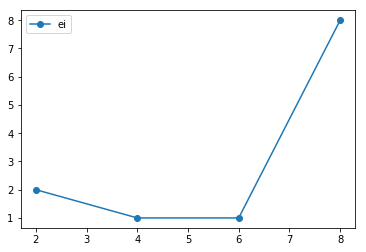

In [78]:
tmp = []
for k in kap:
    record = choose_param(kap = k)
    tmp.append(len(record))
plt.plot(kap, tmp, 'o-', label = f)
plt.legend(loc = "best")
plt.show()